# Exoplanets Large and Small
## Interesting Discoveries from TESS

### It's time to try to find some exoplanets for ourselves!  In this workshop, we will look at some interesting discoveries from TESS, and measure some properties of real exoplanets.

This is called a "Jupyter Notebook."  It is a handy way to look at data using computer code. We will make sure you can download this Jupyter Notebook when you get home. Also, the 1-page handout has some links where you can get involved with other astronomy projects.

 You can run the code in a Jupyter Notebook your self. Just click on the box with the code (this is called a "code block"), and then type "Shift + Enter". This will run the code and move you to the next code block.

Some code blocks just have instructions. They are helpful guides! Just read these code blocks, and type "Shift + Enter" again when you are ready to move forward.

We are coding in a programming language called `python`. The first thing we do in `python` is load up a bunch of useful tools.

In [66]:
#Load in useful tools
!pip install numpy
!pip install astropy
!pip install matplotlib
!pip install bokeh
!pip install ipywidgets

import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
%matplotlib inline


from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook


from ipywidgets import interact, fixed

def rebin(x,y,bins, min_points=None):
    """
    For rebinning data, maybe changing the sampling of a lightcurve
    (to build signal).
    """
    index = np.digitize(x,bins)
    xout = np.zeros(len(bins) )
    yout = np.zeros(len(bins) )
    for i in np.unique(index):
        if i == 0 or i == len(bins):
            continue
        m = np.where(index == i)[0]
        #print(len(x[m]))
        if min_points is not None:
            if len(x[m]) < min_points:
                continue

        xout[i - 1] = np.mean(x[m])
        yout[i - 1] = np.mean(y[m])

    return xout, yout

#New, for online distribution:
#pull data from github, and upack it here:
!wget https://raw.githubusercontent.com/mmfausnaugh/tech-savvy-2024-exoplanets/main/tech_savy_data.tgz
!tar -xvzf tech_savy_data.tgz

# TESS Planet 1: TOI-3450 b

OK! First, let's load up some TESS data and see what it looks like. This is a "light curve" (Brightness vs. Time).

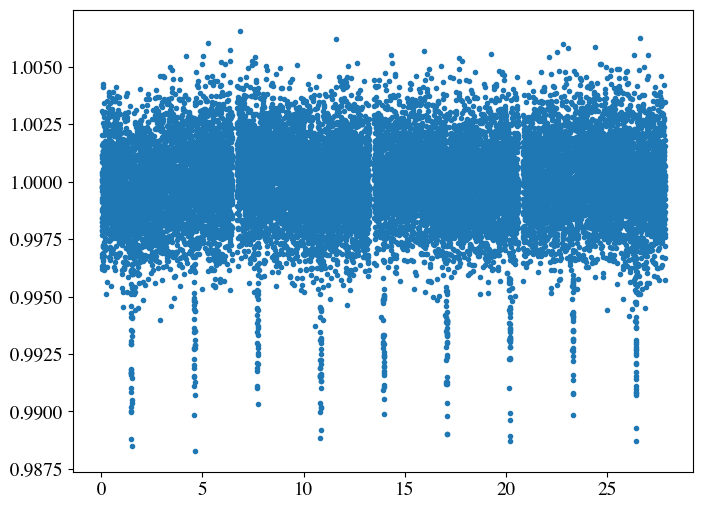

In [67]:
#read the data
data_for_planet1 = fits.open('tess2022244194134-s0056-0000000017865622-0243-s_lc.fits')
t,f = data_for_planet1[1].data['TIME'],data_for_planet1[1].data['PDCSAP_FLUX']

#clean up the data a little bit, this makes it easier to see the light curve.
t = t - t[0]
f = f/np.nanmedian(f)

#visualize the data---this will make our light curve!
plt.plot(t,f,'.')

What are those weird dips? To find out, let's try a bunch of test periods, and see if we can make the dips line up with eachother. 

The period is the time time it takes the planet to go around its star. If we can get all the dips to line up, we have pretty good evidence that this is a planet candidate!



In [69]:
output_notebook()
p = figure()
circles = p.circle(x = t/30, y = f)
#circles = p.circle()


nb_handler = show(p, notebook_handle=True)

def phase_fold(x, P):
    new_x = (x/P)%1
    print("The test period is: {:.4f} days.".format(P))
    circles.data_source.data['x'] = new_x
    push_notebook()
    
def phase_fold2(x, Test_Period):
    P = float(Test_Period)
    new_x = (x/P)%1
    circles.data_source.data['x'] = new_x
    push_notebook()
    
interact(phase_fold, x=fixed(t), P=(2.,4,0.0025))
interact(phase_fold2, x=fixed(t), Test_Period="30.0")

Loading BokehJS ...

interactive(children=(FloatSlider(value=3.0, description='P', max=4.0, min=2.0, step=0.0025), Output()), _dom_…

interactive(children=(Text(value='30.0', description='Test_Period'), Output()), _dom_classes=('widget-interact…

<function __main__.phase_fold2(x, Test_Period)>

Use the slider to try out different periods. You can drag the slider or use arrow keys. These are measured in Earth-days. You can also enter your own period to try by hand in the box "Test_Period."

There are also tools on the right side of the figure. You can use those to shift the figure around, or zoom in. Zoom in on the dips to look at their shapes!

## Questions:

### 1 - What is the best period?

### 2 - What do you notice about the shape of the dips?

### 3 - How big is the dip? (How low does the dip get?)

## TOI-3450 b

These dips are called a "transit." The transit is caused by the planet moving in front of the star, and blocking out some of the light.

This planet is the biggest planet that TESS has found, so far. It is about 1% the size of its host star. It turns out this planet is about twice as big as Jupiter!

The planet was confirmed by 2 telescopes one the ground, one in Arizon, one in Hawai'i. The telescopes measured the planet's mass, and foudn that TOI-3450 b is 1.2 times the mass of Jupiter.

The weirdest thing about this planet is that it is very close to its host star. TOI-3450 b orbits its host star every 3.12 Earth days! Enter your age in the cell block below to figure out how old you are in years of TOI-3450 b:

In [70]:
my_age = 5

print("My age on TOI-3450 b is {:.2f} orbital periods.".format( my_age*365/3.12) )

My age on TOI-3450 b is 584.94 orbital periods.


# TESS Planet 2: LHS 1678 b
    
Let's look for more planets! Here is another TESS light curve.

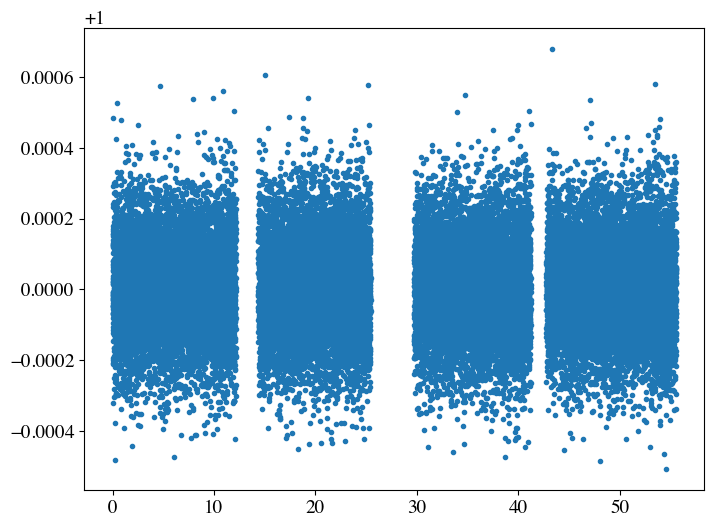

In [71]:
#read in the data. We have extra TESS data for this one!

f1 = fits.open('tess2020294194027-s0031-0000000077156829-0198-s_lc.fits')
f2 = fits.open('tess2020324010417-s0032-0000000077156829-0200-s_lc.fits')

#clean up the data, make it easier to see
flag1 = f1[1].data['QUALITY'] > 0
flag2 = f2[1].data['QUALITY'] > 0
tsmall = np.r_[f1[1].data['TIME'][~flag1], f2[1].data['TIME'][~flag2]]

fuse1 = f1[1].data['PDCSAP_FLUX'][~flag1] - np.mean(f1[1].data['PDCSAP_FLUX'][~flag1]) + 1.e5, 
fuse2 = f2[1].data['PDCSAP_FLUX'][~flag2] - np.mean(f2[1].data['PDCSAP_FLUX'][~flag2]) + 1.e5,
fsmall = np.r_[np.ravel(fuse1),  np.ravel(fuse2)] 

fsmall = fsmall/np.median(fsmall)

tsmall = tsmall - tsmall[0]

plt.plot(tsmall, fsmall,'.')

Uh-oh, no obvious dips or transits in this light curve. Could there be any planets?

Let's try the same experiment as before---we can test a bunch of different periods, and see if there is a transit signal (dip in the light curve).  Small planets make smaller dips, so maybe it is just hard to see.

We can try to average some of the data points to gether, which can help us see any transits.

In [72]:
output_notebook()
p2 = figure()
circles = p2.circle(x = tsmall/60, y = fsmall,
                   legend_label="TESS data")


#this block does the averaging
bins = np.r_[0:1:200j]
xb,yb = rebin(tsmall/60.0, fsmall, bins )
m = xb == 0
xb = xb[~m]
yb = yb[~m]
circles2 = p2.circle(x = xb, y = yb,color='red',
                    legend_label="Average of 175 data points")

nb_handler = show(p2, notebook_handle=True)

def phase_fold(x, y, bins,P):
    new_x = (x/P)%1
    print("The test period is: {:.4f} days.".format(P))
    xb2,yb2 = rebin(new_x, y, bins )
    m = xb2 == 0
    xb2 = xb2[~m]
    yb2 = yb2[~m]
    #print(len(new_x),len(xb2),len(yb2))

    circles.data_source.data['x'] = new_x
    circles2.data_source.data['x'] = xb2
    circles2.data_source.data['y'] = yb2
    
    push_notebook()
    
def phase_fold2(x, y, bins, Test_Period):
    P = float(Test_Period)
    new_x = (x/P)%1
    xb2,yb2 = rebin(new_x, y, bins )
    m = xb2 == 0
    
    xb2 = xb2[~m]
    yb2 = yb2[~m]


    circles.data_source.data['x'] = new_x
    circles2.data_source.data['x'] = xb2
    circles2.data_source.data['y'] = yb2
    
    push_notebook()

    
interact(phase_fold, x=fixed(tsmall), y= fixed(fsmall),bins = fixed(bins), P=(0.85, 0.868,0.0001))
interact(phase_fold2, x=fixed(tsmall), y= fixed(fsmall),bins = fixed(bins), Test_Period="26")

Loading BokehJS ...

interactive(children=(FloatSlider(value=0.859, description='P', max=0.868, min=0.85, step=0.0001), Output()), …

interactive(children=(Text(value='26', description='Test_Period'), Output()), _dom_classes=('widget-interact',…

<function __main__.phase_fold2(x, y, bins, Test_Period)>

Just like before, use the slider to try out different periods. You can drag the slider or use arrow keys. 

## Questions:

### 1 - There is a planet in here somewhere. Can you find the transit? 

### 2 - If so, what is the best period?

### 3 - If so, how big is the dip? (How low does the transit get?)

##  LHS 1678 b

 LHS 1678 b is the smallesst planet that TESS has found so far (Feb. 2024). It has a radius that is smaller than the Earth, about 0.7 times the size of the Earth. But the dips is hard to measure, so the radius could be as small as 0.5 times the Earth radius or as large as 1.0 times the Earth radius.  Mars is about 0.5 times the size of the Earth, so this planet is probably somewhere inbetween the size of the Earth and Mars.
 
A global newtork of telescopes confirmed this planet---including one telescope at McDonald Observatory in Texas! (Telescopes in Hawai'i, Chile in South America, South Africa, and Australia also contributed.) Astronomers couldn't measure the mass, but they did put an upper limit on the mass. This planet cannot be more massive than 0.35 Earth masses, or we would have been able to measure the mass.

Density is mass divided by volume---the Earth is made of rocks and metals, and has a density of about 5 grams per cubic centimeter. This planet must have a density less than 3 grams per cubic centimeter. That means it could be made out of rocks, but they would need to have less metals than the Earth. The planet could also be very low density--maybe it is made of water! (Water has a density of 1 gram per cubic centimeter.)

It turns out astronomers found a second planet around this star. It is about the size of the Earth, and goes around the star every 3.6942 days. This planet is named LHS 1678 c. 

**To see the second planet, type in `3.6942` for `Test_Period` in the box above.**



# TESS Planet System 3: TOI-4010

Let's look at one more star. 

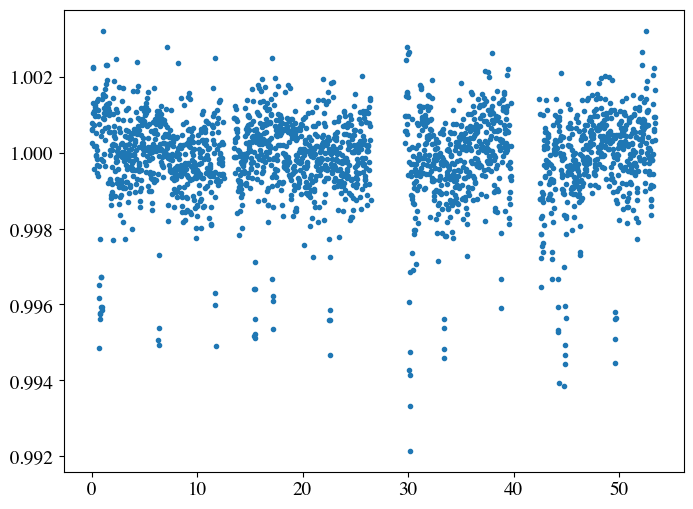

In [73]:

#load up data
f1 = fits.open('hlsp_tess-spoc_tess_phot_0000000352682207-s0024_tess_v1_lc.fits')
f2 = fits.open('hlsp_tess-spoc_tess_phot_0000000352682207-s0025_tess_v1_lc.fits')

#clean data
flag1 = f1[1].data['QUALITY'] > 0
flag2 = f2[1].data['QUALITY'] > 0

tmulti = np.r_[f1[1].data['TIME'][~flag1], f2[1].data['TIME'][~flag2]]
fuse1 = f1[1].data['PDCSAP_FLUX'][~flag1] - np.mean(f1[1].data['PDCSAP_FLUX'][~flag1]) + 3750 
fuse2 = f2[1].data['PDCSAP_FLUX'][~flag2] - np.mean(f2[1].data['PDCSAP_FLUX'][~flag2]) + 3750

fmulti = np.r_[np.ravel(fuse1),  np.ravel(fuse2)] 
fmulti = fmulti/np.median(fmulti)
tmulti = tmulti - tmulti[0]

m2 = (tmulti > 27) & (tmulti < 29.7)
tmulti = tmulti[~m2]
fmulti = fmulti[~m2]

plt.plot(tmulti, fmulti,'.')

Hmmm, looks like a lot of dips, and some dips are big while other dips are small. Could there be more than one planet?

In [74]:
output_notebook()
p3 = figure()
circles = p3.circle(x = tmulti/55, y = fmulti,
                   legend_label="TESS data")



bins = np.r_[0:1:200j]
xb,yb = rebin(tmulti/55, fmulti, bins )
m = xb == 0
xb = xb[~m]
yb = yb[~m]
circles2 = p3.line(x = xb, y = yb,color='red',
                    legend_label="Average of 7 data points")

nb_handler = show(p3, notebook_handle=True)
interact(phase_fold, x=fixed(tmulti), y= fixed(fmulti),bins = fixed(bins), P=(1.29,14.8,0.002))
interact(phase_fold2, x=fixed(tmulti), y= fixed(fmulti),bins = fixed(bins), Test_Period="55.0")



Loading BokehJS ...

interactive(children=(FloatSlider(value=8.044, description='P', max=14.8, min=1.29, step=0.002), Output()), _d…

interactive(children=(Text(value='55.0', description='Test_Period'), Output()), _dom_classes=('widget-interact…

<function __main__.phase_fold2(x, y, bins, Test_Period)>

Just like before, use the slider to try out different periods. You can drag the slider or use arrow keys. 

## Questions:

### 1 - How many planets can you find in this system? 

### 2 - What are the best periods of each planet? How big are the dips?


## TOI-4010

There are 3 planets in this system! They are tough to find, but the periods are:
- 1.348335 days
- 5.414654 days
- and 14.70886 days.

Try typing these periods into the "Test_Period" box above to see what these planets look like.

The planets are named b, c, and d going from short period to long period (close by the star to far from the star). They have sizes of

- TOI-4010 b: 3.0 times the radius of the Earth,
- TOI-4010 c: 5.9 times the radius of the Earth, and
- TOI-4010 d: 6.2 times the radius of the Earth.

TOI-4010 b is a "sub-Neptune" it is a bit smaller than Neptune (Neptune is about 4 times the radius of the Earth). TOI-4010 c and d are "sub-Saturns"; they are a bit smaller than Saturn (Saturn is about 8 times the radius of the Earth). We don't have any sub-Neptunes in our solar system, but sub-Neptunes seem to be one of the most common types of planets in the universe!

It turns out that planets are often found together: if a Star has a planet, it is very like that the star has more than one planet. Why this is the case is still a mystery!  But lot's of astronomers are trying to figure out why many planets seem to form at the same time. Maybe one day you can help find out the answer!